# Importing Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
#from sklearn.metrics import precision_recall_fscore_support 

from sklearn.metrics import roc_auc_score,roc_curve,auc
import warnings
warnings.filterwarnings("ignore")

import re

import plotly as py 
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 

In [9]:
data=pd.read_csv(r"XYZCorp_LendingData.txt",sep="\t")

In [10]:
pd.options.display.max_columns=None
data.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [11]:
data.shape

(855969, 73)

In [29]:
napercent=[data[i].isna().sum()*100/data.shape[0] for i in data.columns if (data[i].isna().sum()*100/data.shape[0])>25]
nacols=[i for i in data.columns if (data[i].isna().sum()*100/data.shape[0])>25]

<AxesSubplot:>

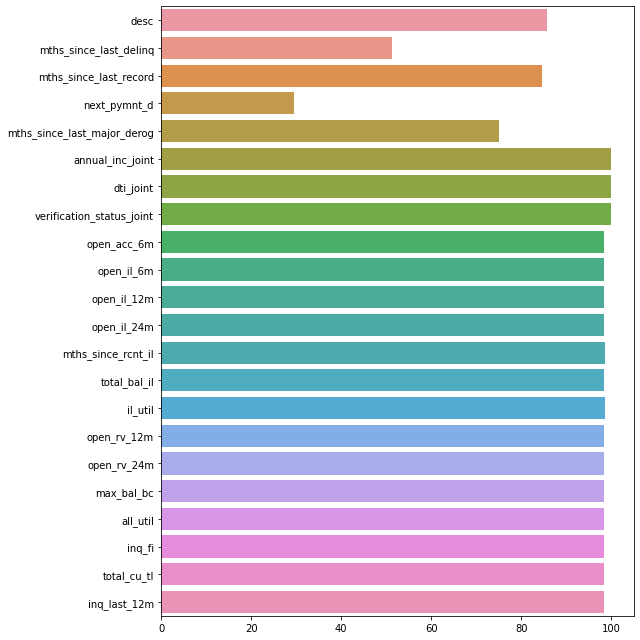

In [31]:
plt.rcParams["figure.figsize"]=[9,9]
plt.rcParams["figure.autolayout"]=True
sns.barplot(napercent,nacols)

From Above plot its clear that below columns have many na values and therefore not useful in building the model:
1.  desc
2.  mths_since_last_delinq
3.  mths_since_last_record
4.  next_pymnt_d
5.  mths_since_last_major_derog
6.  annual_inc_joint              
7.  dti_joint                     
8.  verification_status_joint     
9.  open_acc_6m                   
10.  open_il_6m                    
11.  open_il_12m                   
12.  open_il_24m                   
13.  mths_since_rcnt_il            
14.  total_bal_il                  
15. il_util                     
16. open_rv_12m                   
17. open_rv_24m                    
18. max_bal_bc                    
19. all_util                       
20. inq_fi                        
21. total_cu_tl                  
22. inq_last_12m
So we will remove these columns from the dataset

In [33]:
df=data.drop(["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d",
                "mths_since_last_major_derog","annual_inc_joint","dti_joint","verification_status_joint",
              "open_acc_6m","open_il_6m","open_il_12m", "open_il_24m","mths_since_rcnt_il",
              "total_bal_il","il_util","open_rv_12m" ,"open_rv_24m","max_bal_bc" ,
              "all_util" ,"inq_fi","total_cu_tl", "inq_last_12m"],axis=1).copy()

In [34]:
df.shape

(855969, 51)

In [42]:
navalue=[df[i].isna().sum()*100/df.shape[0] for i in df.columns if df[i].isna().sum()*100/df.shape[0]>0]
cols=[i for i in df.columns if df[i].isna().sum()*100/df.shape[0]>0 ]

In [47]:
na_df=pd.DataFrame({"cols":cols,"navalue":navalue})

In [48]:
na_df

,cols,navalue
0,emp_title,5.776261
1,emp_length,5.030673
2,title,0.003855
3,revol_util,0.052105
4,last_pymnt_d,1.035318
5,last_credit_pull_d,0.005841
6,collections_12_mths_ex_med,0.006542
7,tot_coll_amt,7.863953
8,tot_cur_bal,7.863953
9,total_rev_hi_lim,7.863953


# NA treatment

In [51]:
df.describe(include=["O"])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
count,855969,855969,855969,806526,812908,855969,855969,855969,855969,855969,855936,855969,855969,855969,855969,847107,855919,855969
unique,2,7,35,290912,11,6,3,103,2,14,60991,931,51,697,2,97,102,2
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2015,n,debt_consolidation,Debt consolidation,945xx,CA,Aug-2001,f,Jan-2016,Jan-2016,INDIVIDUAL
freq,600221,247998,54958,12965,282090,429106,318178,48212,855964,505392,398089,9466,125172,6433,442555,467510,701687,855527


As the title column has 60991 unique values we will discard this column from our analysis.

As emp_title has 290912 unique values we will discard this column from our analysis

In [52]:
d=df.drop(["emp_title","title"],axis=1).copy()

In [56]:
d.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,855969.0,855969.000000,7.886560e+05,7.886560e+05,7.886560e+05,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,1.0,0.004944,2.254129e+02,1.397662e+05,3.216357e+04,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,0.0,0.077333,1.048945e+04,1.539385e+05,3.769964e+04,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,1.0,0.000000,0.000000e+00,2.987000e+04,1.400000e+04,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,1.0,0.000000,0.000000e+00,8.100850e+04,2.380000e+04,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,1.000000,14.000000,0.000000,2.085700e+04,73.500000,32.000000,13528.800000,13522.510000,10744.803649,10697.33000,8000.000000,2233.980000,0.000000,0.000000,0.000000,849.160000,0.000000,1.0,0.000000,0.000000e+00,2.087032e+05,3.990000e+04,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,8.000000,90.000000,86.000000,2.904836e+06,892.300000,169.000000,49372.860000,49372.860000,57777.579870,57777.58000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36475.590000,20.000000,1.0,14.000000,9.152545e+06,8.000078e+06,9.999999e+06,1.000000


In [57]:
d["policy_code"].unique()

array([1.])

As policy code has only 1 value throughout we will remove this column from our analysis

In [58]:
d=d.drop(["policy_code"],axis=1).copy()

default_ind column is the target column to be predicted (1,0).
We will make this column categorical

In [60]:
d["default_ind"]=d.default_ind.astype("category")
tgt_ind_vc=d.default_ind.value_counts()

In [62]:
tgt_ind_vc*100/d.shape[0]

0    94.571416
1     5.428584
Name: default_ind, dtype: float64

Therefore the data is highly imbalanced.

In [63]:
d.to_csv("basic_screened_data.csv")